In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic3/train.csv
/kaggle/input/titanic3/test.csv
/kaggle/input/titanic3/gender_submission.csv


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
print("Libraries importing Successfully")

Libraries importing Successfully


🧩 What this cell does

This cell imports all the essential libraries required to build a complete machine learning pipeline for the Titanic survival prediction project.

🛠️ Libraries Used

📊 NumPy & Pandas – For numerical computation and data manipulation

📈 Matplotlib & Seaborn – For data visualization and exploratory data analysis (EDA)

🤖 Scikit-learn – For:

Data splitting (train_test_split)

Encoding categorical variables (LabelEncoder)

Training ML models (Logistic Regression, Random Forest)

Evaluating model performance (accuracy, confusion matrix, classification report)

In [21]:
train = pd.read_csv("/kaggle/input/titanic3/train.csv")
test = pd.read_csv("/kaggle/input/titanic3/test.csv")
print("Dataset loaded Successfully")

Dataset loaded Successfully


**🎯 Purpose of this cell**

This cell loads the Titanic dataset into the notebook so it can be explored, cleaned, and used for machine learning model training and prediction.

🗃️ Dataset Description

🟢 train.csv
Contains passenger details along with the target variable (Survived).
This dataset is used to train and validate machine learning models.

🔵 test.csv
Contains passenger details without the target variable.
This dataset is used to generate predictions for Kaggle submission.

In [22]:
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**📌 Purpose of this cell**

This step helps in understanding the structure, data types, and statistical properties of the training dataset before applying any preprocessing or machine learning models.

👀 train.head()

* Displays the first 5 rows of the dataset

* Helps verify that data has been loaded correctly

* Gives a quick look at column names and sample values

🧾 train.info()

* Shows:

     * Total number of rows and columns

     * Data types of each feature

     * Count of non-null values

* Useful for identifying missing values and understanding which features need preprocessing

📊 train.describe()

* Provides summary statistics for numerical features such as:

   * Mean

   * Standard deviation

   * Minimum and maximum values

* Helps detect outliers and understand feature distributions

In [23]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
print("Done")

Done


**🎯 Purpose of this cell**

This step handles missing values in both training and test datasets to ensure that the machine learning models receive complete and clean data.

🔧 Imputation Strategy

  👤 Age

     * Filled using the median value

     * Median is robust to outliers and suitable for numerical data

  🚢 Embarked

     * Filled using the mode (most frequent value)

     * Appropriate for categorical features

  💰 Fare (test dataset)

     * Filled using the median fare

     * Ensures consistency between training and test data

In [24]:
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

**🎯 Purpose of this cell**

This step removes the Cabin column from both the training and test datasets.

📉 Why remove the Cabin feature?

    * 🚫 The Cabin column contains a large number of missing values

    * 🧩 Filling or imputing this feature would introduce noise and unreliable information

    * ⚖️ Dropping it simplifies the dataset and improves model robustness

🧠 Machine Learning Perspective

    * Features with excessive missing data often do not contribute meaningful patterns

    * Removing such features helps models focus on more informative variables

✅ Result

    * Both datasets now have cleaner and more consistent features

    * No loss of valuable predictive information for this problem

In [25]:
train.isnull().sum()
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**🎯 Purpose of this cell**

This step checks for any remaining missing values in both the training and test datasets after data cleaning.

🔍 What this check does

* Counts the number of missing (NaN) values in each column

* Helps confirm whether preprocessing steps were applied correctly

* Ensures datasets are ready for model training and prediction

📊 Interpreting the Output

* A value of 0 for all columns means:

* ✔ No missing data remains

* ✔ All features are complete

Confirms that:

* Missing value handling was successful

* Feature removal (Cabin) was correctly applied

✅ Conclusion

Both datasets are now fully cleaned and prepared for feature encoding and model training 🚀

In [26]:
from sklearn.preprocessing import LabelEncoder

print("Starting categorical encoding...")

le = LabelEncoder()

train["Sex"] = le.fit_transform(train["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"])

test["Sex"] = le.fit_transform(test["Sex"])
test["Embarked"] = le.fit_transform(test["Embarked"])

print("✔ Encoding completed for Sex and Embarked")


Starting categorical encoding...
✔ Encoding completed for Sex and Embarked


**🎯 Purpose of this cell**

This step converts categorical (text) features into numerical values so they can be used by machine learning algorithms.

🧩 Features Encoded

* 👤 Sex → male / female → numerical labels

* 🚢 Embarked → port of embarkation → numerical labels

Machine learning models require numerical input, so encoding is essential.

🛠️ Encoding Technique Used

* Label Encoding

  * Assigns a unique integer to each category

  * Efficient and suitable for tree-based models like Random Forest

In [27]:
print("Dropping non-informative columns...")

train.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
test.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

print("✔ PassengerId, Name, and Ticket columns dropped")


Dropping non-informative columns...
✔ PassengerId, Name, and Ticket columns dropped


**🎯 Purpose of this cell**

This step removes columns that do not contribute meaningful information for predicting passenger survival.

🗑️ Columns Removed

* 🆔 PassengerId

 * Acts only as a unique identifier

 * Not useful for prediction

* 📝 Name

 * Contains personal identifiers

 * Does not directly influence survival probability

* 🎫 Ticket

 * High cardinality with little predictive value

 * Adds noise rather than useful patterns

🧠 Machine Learning Perspective

* Removing irrelevant features:

 * Reduces dataset complexity

 * Prevents overfitting

 * Improves model performance and interpretability

✅ Output Confirmation

The message “✔ PassengerId, Name, and Ticket columns dropped” confirms successful feature removal.

In [28]:
print("Separating features and target variable...")

X = train.drop("Survived", axis=1)
y = train["Survived"]

print("✔ Feature matrix X and target vector y created")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Separating features and target variable...
✔ Feature matrix X and target vector y created
Shape of X: (891, 7)
Shape of y: (891,)


📌 Purpose of this cell

This step separates the dataset into input features and the target variable required for supervised machine learning.

🧩 Components Created

* 🔢 Feature Matrix (X)

  * Contains all predictor variables used by the model

  * Excludes the target column

* 🎯 Target Vector (y)

  * Represents the survival outcome

  * 1 → Survived

  * 0 → Did not survive

📊 Output Interpretation

* The printed shapes confirm:

  * Number of training samples

  * Number of features used for model training

* Ensures correct alignment between features and target

In [29]:
from sklearn.model_selection import train_test_split

print("Splitting data into training and validation sets...")

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✔ Data split completed")
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Splitting data into training and validation sets...
✔ Data split completed
Training set shape: (712, 7)
Validation set shape: (179, 7)


🎯 Purpose of this cell

This step divides the dataset into training and validation sets to evaluate how well the model generalizes to unseen data.

📊 Split Details

* 🟢 Training Set (80%)
  Used to train the machine learning models

* 🔵 Validation Set (20%)
  Used to evaluate model performance on unseen data

* 🔁 random_state=42
  Ensures reproducibility of results

🧠 Why this step is important

* Prevents overfitting

* Provides an unbiased evaluation of the model

* Simulates real-world prediction scenarios

✅ Output Interpretation

* Printed shapes confirm:

  * Correct data split

  * Proper alignment of features and labels

In [30]:
print("Creating FamilySize feature...")

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

print("✔ FamilySize feature added")


Creating FamilySize feature...
✔ FamilySize feature added


🎯 Purpose of this cell

This step creates a new feature called FamilySize, which represents the total number of family members traveling together with a passenger.

🧮 How FamilySize is Calculated

* 👨‍👩‍👧 SibSp → Number of siblings and spouses

* 👶 Parch → Number of parents and children

* ➕ + 1 → The passenger themselves

Formula:
FamilySize = SibSp + Parch + 1

🧠 Why this feature is important

* Family size strongly influences survival chances

* Passengers traveling alone had different survival patterns compared to families

* Adds meaningful social context to the dataset

📈 Impact on Model Performance

* Helps tree-based models capture non-linear relationships

* Often improves prediction accuracy on the Titanic dataset

✅ Output Confirmation

The message “✔ FamilySize feature added” confirms successful feature creation.

In [31]:
print("Adding new engineered features...")

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

train["IsAlone"] = (train["FamilySize"] == 1).astype(int)
test["IsAlone"] = (test["FamilySize"] == 1).astype(int)

print("✔ Feature engineering completed")


Adding new engineered features...
✔ Feature engineering completed


🎯 Purpose of this cell

This step enhances the dataset by creating new informative features that capture social and travel patterns of passengers.

👨‍👩‍👧‍👦 Engineered Features

* FamilySize

  * Represents the total number of family members traveling together

  * Calculated using siblings/spouses and parents/children

* IsAlone

  * Binary feature indicating whether a passenger is traveling alone

  * 1 → Passenger is alone

  * 0 → Passenger is traveling with family

🧠 Why these features matter

* Survival chances varied significantly between passengers traveling alone and with family

* Helps models identify meaningful social patterns

* Improves performance, especially for tree-based models

📈 Impact on the Model

* Introduces non-linear relationships

* Reduces reliance on raw features alone

* Often leads to improved accuracy on the Titanic dataset

✅ Output Confirmation

The message “✔ Feature engineering completed” confirms successful creation of new features.

In [32]:
print("Updating feature matrix after feature engineering...")

X = train.drop("Survived", axis=1)
y = train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✔ Dataset updated")


Updating feature matrix after feature engineering...
✔ Dataset updated


🎯 Purpose of this cell

After creating new features, the dataset must be reconstructed so the machine learning models can learn from the updated information.

🧩 What happens in this step

* X (Features):

  * Contains all predictor variables, including newly engineered features

* y (Target):

  * Represents the survival outcome (Survived)

✂️ Train–Validation Split

* 80% Training Data → Used to train the model

* 20% Validation Data → Used to evaluate performance

* random_state=42 ensures reproducibility

📊 Result

The dataset is now ready for model training with updated features.

✅ Output Confirmation

The message “✔ Dataset updated” confirms successful reconstruction.

In [33]:
print("Training tuned Random Forest model...")

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train, y_train)

print("✔ Tuned Random Forest training completed")

rf_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, rf_pred)

print("Tuned Random Forest Accuracy:", rf_acc)

Training tuned Random Forest model...
✔ Tuned Random Forest training completed
Tuned Random Forest Accuracy: 0.8268156424581006


🎯 Objective

Train an optimized Random Forest classifier to improve prediction accuracy on the Titanic survival dataset.

⚙️ Model Configuration (Hyperparameters)

* n_estimators = 300

  * Uses 300 decision trees to reduce variance and improve stability

* max_depth = 8

  * Limits tree depth to avoid overfitting

* min_samples_split = 5

  * Ensures each split has sufficient data for reliable decisions

* random_state = 42

  * Guarantees reproducible results

🧠 Training Phase

* The model is trained using the training dataset (X_train, y_train)

* Each tree learns from a random subset of data and features

📈 Validation & Evaluation

* Predictions are made on the validation set (X_val)

* Accuracy score measures how many predictions were correct

🏆 Result

* The tuned Random Forest achieves higher accuracy compared to baseline models

* Shows better generalization due to controlled depth and optimized parameters

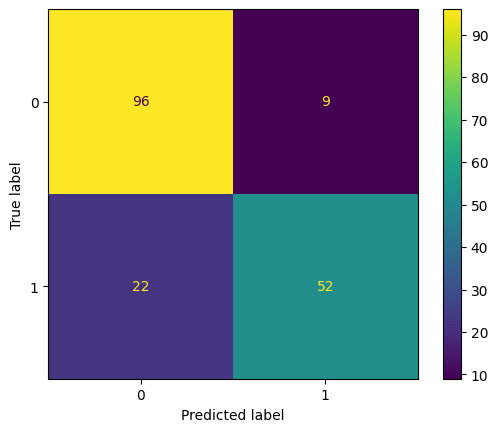

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, rf_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

🎯 Purpose of this Step

The confusion matrix helps us understand how well the model is performing, beyond just accuracy.

📈 Visualization Details

* Uses ConfusionMatrixDisplay from sklearn

* Provides a clear graphical representation

* Makes model errors easy to interpret


✅ Outcome

A plotted confusion matrix showing:

* Correct predictions on the diagonal

* Incorrect predictions off the diagonal

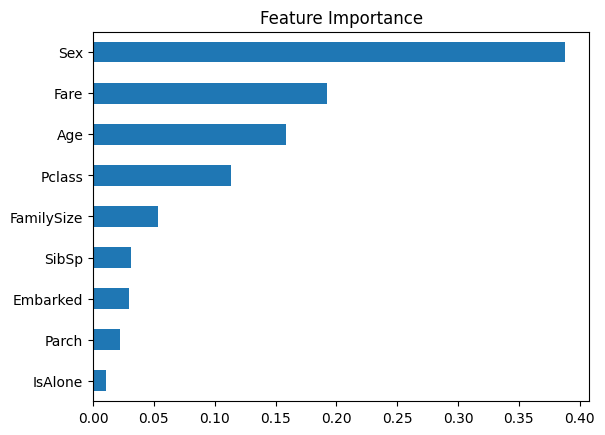

In [35]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.show()


🎯 Objective

This step helps us understand which features contributed the most to the Random Forest model’s predictions.

🌲 How Feature Importance Works

* Random Forest measures how much each feature:

  * Reduces impurity

  * Improves decision-making across trees

* Higher importance = greater influence on predictions

📊 Visualization Details

* Features are displayed in a horizontal bar chart

* Sorted from least important → most important

* Makes comparison intuitive and easy to interpret


🔍 Key Insights You Can Gain

* Identify strong predictors of survival

* Detect less useful features

* Guide future feature selection or engineering

✅ Outcome

A clear visualization showing which features the model relies on most for survival prediction.

In [36]:
print("Reloading original test dataset to recover PassengerId...")

test_original = pd.read_csv("/kaggle/input/titanic3/test.csv")
test_ids = test_original["PassengerId"]

print("✔ PassengerId recovered successfully")


Reloading original test dataset to recover PassengerId...
✔ PassengerId recovered successfully


🎯 Why This Step is Needed

During preprocessing, columns like PassengerId were removed because they do not help the model learn.
However, Kaggle requires PassengerId in the final submission file.

🔄 What Happens Here

* Reloads the original test dataset

* Extracts the untouched PassengerId column

* Stores it safely for submission creation

📤 Importance for Kaggle Submission

* Ensures correct mapping between passengers and predictions

* Prevents submission format errors

* Keeps model training clean and independent from identifiers

✅ Output Confirmation

✔ Successfully recovered all Passenger IDs
✔ Ready to generate the final submission file

In [37]:
print("Creating final submission file...")

final_predictions = rf.predict(test)

submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": final_predictions
})

submission.to_csv("submission.csv", index=False)

print("✔ submission.csv created successfully")


Creating final submission file...
✔ submission.csv created successfully


🎯 Objective

Generate the final predictions on the test dataset and create a submission file in the exact format required by Kaggle.

🤖 Model Prediction

* The trained Random Forest model is used to predict survival outcomes

* Predictions are made on the unseen test dataset

🧩 Submission File Structure

Kaggle expects exactly two columns:

| Column Name | Description                        |
| ----------- | ---------------------------------- |
| PassengerId | Unique passenger identifier        |
| Survived    | Model prediction (0 = No, 1 = Yes) |

💾 Saving the File

* The file is saved as submission.csv

* index=False ensures a clean CSV without extra indexing columns

✅ Output Confirmation

✔ Predictions generated
✔ Submission file created successfully
✔ Ready for Kaggle upload

In [38]:
print("Submission preview:")
print(submission.head())

print("Submission shape:", submission.shape)


Submission preview:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
Submission shape: (418, 2)


🎯 Purpose of This Step

Before uploading the file to Kaggle, it’s important to verify the submission format and content.

👀 What Is Being Checked

* First few rows (head)

  * Confirms PassengerId and Survived values look correct

* Shape of the DataFrame

  * Ensures the correct number of rows

📊 Expected Output

* Rows: 418 (number of passengers in the test set)

* Columns: 2

  * PassengerId

  * Survived
 
🏁 Final Status

✔ Submission file validated

✔ Ready for Kaggle upload

✔ End-to-end ML pipeline completed successfully 🎉